<a href="https://colab.research.google.com/github/kilkuwu/pytorch-deep-learning/blob/main/lessons/03/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Thị Giác Máy Tính với PyTorch

[Thị giác máy tính](https://en.wikipedia.org/wiki/Computer_vision) là nghệ thuật dạy máy tính nhìn và hiểu.

Ví dụ, nó có thể bao gồm việc xây dựng một mô hình để phân loại xem một bức ảnh là của mèo hay chó ([phân loại nhị phân](https://developers.google.com/machine-learning/glossary#binary-classification)).

Hoặc xác định xem một bức ảnh là của mèo, chó hay gà ([phân loại đa lớp](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Hoặc xác định vị trí một chiếc xe xuất hiện trong khung hình video ([phát hiện đối tượng](https://en.wikipedia.org/wiki/Object_detection)).

Hoặc tìm ra cách phân tách các đối tượng khác nhau trong một hình ảnh ([phân đoạn toàn diện](https://arxiv.org/abs/1801.00868)).

![ví dụ các bài toán thị giác máy tính](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Ví dụ các bài toán thị giác máy tính cho phân loại nhị phân, phân loại đa lớp, phát hiện đối tượng và phân đoạn.*

## Thị giác máy tính được sử dụng ở đâu?

Nếu bạn sử dụng điện thoại thông minh, bạn đã sử dụng thị giác máy tính rồi.

Các ứng dụng camera và ảnh sử dụng [thị giác máy tính để nâng cao](https://machinelearning.apple.com/research/panoptic-segmentation) và sắp xếp hình ảnh.

Ô tô hiện đại sử dụng [thị giác máy tính](https://youtu.be/j0z4FweCy4M?t=2989) để tránh các xe khác và giữ trong làn đường.

Các nhà sản xuất sử dụng thị giác máy tính để xác định khuyết tật trong các sản phẩm khác nhau.

Camera an ninh sử dụng thị giác máy tính để phát hiện kẻ xâm nhập tiềm tàng.

Về bản chất, bất cứ thứ gì có thể được mô tả theo nghĩa thị giác đều có thể là một bài toán thị giác máy tính tiềm năng.

## Những gì chúng ta sẽ học

Chúng ta sẽ áp dụng Quy Trình PyTorch mà chúng ta đã học trong vài phần trước vào thị giác máy tính.

![quy trình PyTorch tập trung vào thị giác máy tính](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Cụ thể, chúng ta sẽ học:

| **Chủ đề** | **Nội dung** |
| ----- | ----- |
| **0. Thư viện thị giác máy tính trong PyTorch** | PyTorch có nhiều thư viện thị giác máy tính tích hợp hữu ích, hãy cùng khám phá chúng.  |
| **1. Tải dữ liệu** | Để thực hành thị giác máy tính, chúng ta sẽ bắt đầu với một số hình ảnh về các loại quần áo khác nhau từ [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Chuẩn bị dữ liệu** | Chúng ta đã có một số hình ảnh, hãy tải chúng bằng [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) để có thể sử dụng chúng với vòng lặp huấn luyện. |
| **3. Mô hình 0: Xây dựng mô hình cơ sở** | Ở đây chúng ta sẽ tạo một mô hình phân loại đa lớp để học các mẫu trong dữ liệu, chúng ta cũng sẽ chọn **hàm mất mát**, **bộ tối ưu hóa** và xây dựng **vòng lặp huấn luyện**. | 
| **4. Dự đoán và đánh giá mô hình 0** | Hãy thực hiện một số dự đoán với mô hình cơ sở và đánh giá chúng. |
| **5. Thiết lập mã không phụ thuộc thiết bị cho các mô hình tương lai** | Việc viết mã không phụ thuộc thiết bị là thực hành tốt nhất, hãy thiết lập nó. |
| **6. Mô hình 1: Thêm tính phi tuyến** | Thử nghiệm là một phần lớn của học máy, hãy cố gắng cải thiện mô hình cơ sở bằng cách thêm các lớp phi tuyến. |
| **7. Mô hình 2: Mạng Neural Tích Chập (CNN)** | Đã đến lúc chuyên biệt hóa thị giác máy tính và giới thiệu kiến trúc mạng neural tích chập mạnh mẽ. |
| **8. So sánh các mô hình** | Chúng ta đã xây dựng ba mô hình khác nhau, hãy so sánh chúng. |
| **9. Đánh giá mô hình tốt nhất** | Hãy thực hiện một số dự đoán trên hình ảnh ngẫu nhiên và đánh giá mô hình tốt nhất của chúng ta. |
| **10. Tạo ma trận nhầm lẫn** | Ma trận nhầm lẫn là một cách tuyệt vời để đánh giá mô hình phân loại, hãy xem cách tạo một ma trận. |
| **11. Lưu và tải mô hình hoạt động tốt nhất** | Vì chúng ta có thể muốn sử dụng mô hình sau này, hãy lưu nó và đảm bảo nó tải lại đúng cách. |

## 0. Thư viện thị giác máy tính trong PyTorch

Trước khi chúng ta bắt đầu viết mã, hãy nói về một số thư viện thị giác máy tính PyTorch mà bạn nên biết.

| Module PyTorch | Nó làm gì? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Chứa các bộ dữ liệu, kiến trúc mô hình và biến đổi hình ảnh thường được sử dụng cho các bài toán thị giác máy tính. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Ở đây bạn sẽ tìm thấy nhiều bộ dữ liệu thị giác máy tính mẫu cho một loạt các bài toán từ phân loại hình ảnh, phát hiện đối tượng, mô tả hình ảnh, phân loại video và hơn thế nữa. Nó cũng chứa [một loạt các lớp cơ sở để tạo bộ dữ liệu tùy chỉnh](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | Module này chứa các kiến trúc mô hình thị giác máy tính hoạt động tốt và thường được sử dụng được triển khai trong PyTorch, bạn có thể sử dụng chúng với các bài toán của riêng mình. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Thường thì hình ảnh cần được biến đổi (chuyển thành số/xử lý/tăng cường) trước khi được sử dụng với mô hình, các biến đổi hình ảnh phổ biến được tìm thấy ở đây. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Lớp bộ dữ liệu cơ sở cho PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Tạo một đối tượng có thể lặp Python trên một bộ dữ liệu (được tạo bằng `torch.utils.data.Dataset`). |

> **Lưu ý:** Các lớp `torch.utils.data.Dataset` và `torch.utils.data.DataLoader` không chỉ dành cho thị giác máy tính trong PyTorch, chúng có khả năng xử lý nhiều loại dữ liệu khác nhau.

Bây giờ chúng ta đã tìm hiểu một số thư viện thị giác máy tính PyTorch quan trọng nhất, hãy import các dependencies liên quan.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.7.1+cu128
torchvision version: 0.22.1+cu128


## 1. Lấy bộ dữ liệu

Để bắt đầu làm việc với bài toán thị giác máy tính, hãy lấy một bộ dữ liệu thị giác máy tính.

Chúng ta sẽ bắt đầu với FashionMNIST.

MNIST viết tắt của Modified National Institute of Standards and Technology.

[Bộ dữ liệu MNIST gốc](https://en.wikipedia.org/wiki/MNIST_database) chứa hàng nghìn ví dụ về chữ số viết tay (từ 0 đến 9) và được sử dụng để xây dựng các mô hình thị giác máy tính nhận dạng số cho dịch vụ bưu điện.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), được tạo bởi Zalando Research, có cách thiết lập tương tự.

Ngoại trừ nó chứa hình ảnh thang độ xám của 10 loại quần áo khác nhau.

![ví dụ hình ảnh FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` chứa rất nhiều bộ dữ liệu mẫu mà bạn có thể sử dụng để thực hành viết mã thị giác máy tính. FashionMNIST là một trong những bộ dữ liệu đó. Và vì nó có 10 lớp hình ảnh khác nhau (các loại quần áo khác nhau), đây là bài toán phân loại đa lớp.*

Sau này, chúng ta sẽ xây dựng một mạng neural thị giác máy tính để nhận dạng các kiểu quần áo khác nhau trong những hình ảnh này.

PyTorch có một loạt các bộ dữ liệu thị giác máy tính phổ biến được lưu trữ trong `torchvision.datasets`.

Bao gồm FashionMNIST trong [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Hãy xem mẫu đầu tiên của dữ liệu huấn luyện.

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Hình dạng đầu vào và đầu ra của mô hình thị giác máy tính

Chúng ta có một tensor lớn các giá trị (hình ảnh) dẫn đến một giá trị duy nhất cho mục tiêu (nhãn).

Hãy xem hình dạng của hình ảnh.

In [4]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

Hình dạng của tensor hình ảnh là `[1, 28, 28]` hoặc cụ thể hơn:

```
[color_channels=1, height=28, width=28]
```

Có `color_channels=1` có nghĩa là hình ảnh ở dạng thang độ xám.

![ví dụ hình dạng đầu vào và đầu ra của bài toán FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Các bài toán khác nhau sẽ có hình dạng đầu vào và đầu ra khác nhau. Nhưng tiền đề vẫn là: mã hóa dữ liệu thành số, xây dựng mô hình để tìm mẫu trong những con số đó, chuyển đổi những mẫu đó thành thứ gì đó có ý nghĩa.*

Nếu `color_channels=3`, hình ảnh có giá trị pixel cho đỏ, xanh lá và xanh dương (điều này còn được gọi là [mô hình màu RGB](https://en.wikipedia.org/wiki/RGB_color_model)).

Thứ tự của tensor hiện tại thường được đề cập là `CHW` (Color Channels, Height, Width).

Có tranh luận về việc hình ảnh nên được biểu diễn dưới dạng `CHW` (kênh màu trước) hay `HWC` (kênh màu sau).

> **Lưu ý:** Bạn cũng sẽ thấy các định dạng `NCHW` và `NHWC` trong đó `N` là viết tắt của *số lượng hình ảnh*. Ví dụ nếu bạn có `batch_size=32`, hình dạng tensor có thể là `[32, 1, 28, 28]`. Chúng ta sẽ đề cập đến kích thước batch sau.

PyTorch thường chấp nhận `NCHW` (kênh trước) là mặc định cho nhiều toán tử.

Tuy nhiên, PyTorch cũng giải thích rằng `NHWC` (kênh sau) hoạt động tốt hơn và được [coi là thực hành tốt nhất](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

Hiện tại, vì bộ dữ liệu và mô hình của chúng ta tương đối nhỏ, điều này sẽ không tạo ra quá nhiều khác biệt.

Nhưng hãy ghi nhớ điều này khi bạn làm việc với các bộ dữ liệu hình ảnh lớn hơn và sử dụng mạng neural tích chập (chúng ta sẽ thấy sau).

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

Vậy chúng ta có 60,000 mẫu huấn luyện và 10,000 mẫu kiểm tra.

Có những lớp nào?

Chúng ta có thể tìm thấy chúng thông qua thuộc tính `.classes`.

In [6]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Tuyệt vời! Có vẻ như chúng ta đang xử lý 10 loại quần áo khác nhau.

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


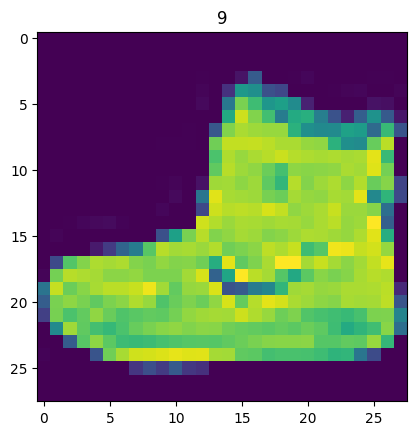

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

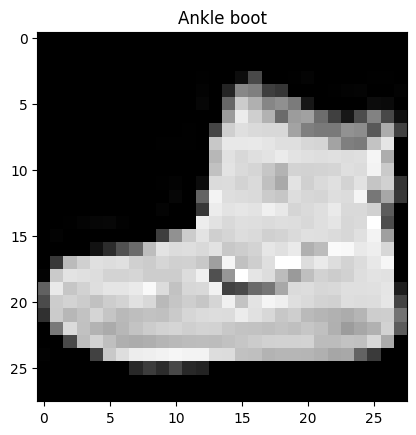

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

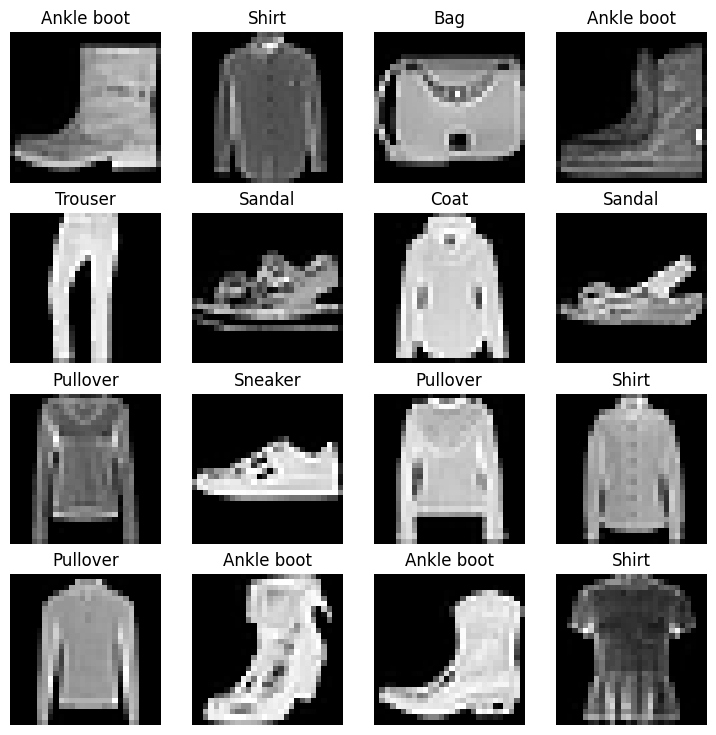

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Hmmm, bộ dữ liệu này trông không quá thẩm mỹ.

Nhưng các nguyên tắc mà chúng ta sẽ học về cách xây dựng mô hình cho nó sẽ tương tự trên một loạt các bài toán thị giác máy tính.

Về bản chất, lấy giá trị pixel và xây dựng mô hình để tìm mẫu trong chúng để sử dụng cho các giá trị pixel tương lai.

Thêm vào đó, ngay cả đối với bộ dữ liệu nhỏ này (vâng, ngay cả 60,000 hình ảnh trong deep learning được coi là khá nhỏ), bạn có thể viết một chương trình để phân loại từng hình ảnh trong số chúng không?

Có lẽ bạn có thể.

Nhưng tôi nghĩ việc lập trình một mô hình trong PyTorch sẽ nhanh hơn.

> **Câu hỏi:** Bạn có nghĩ rằng dữ liệu trên có thể được mô hình hóa chỉ bằng các đường thẳng (tuyến tính) không? Hay bạn nghĩ rằng bạn cũng sẽ cần các đường không thẳng (phi tuyến tính)?

## 2. Chuẩn bị DataLoader

Bây giờ chúng ta đã có một bộ dữ liệu sẵn sàng để sử dụng.

Bước tiếp theo là chuẩn bị nó với [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) hoặc viết tắt là `DataLoader`.

`DataLoader` làm những gì bạn nghĩ nó có thể làm.

Nó giúp tải dữ liệu vào mô hình.

Cho việc huấn luyện và cho việc suy luận.

Nó biến một `Dataset` lớn thành một đối tượng có thể lặp của Python với các phần nhỏ hơn.

Những phần nhỏ hơn này được gọi là **batches** hoặc **mini-batches** và có thể được thiết lập bằng tham số `batch_size`.

Tại sao phải làm điều này?

Bởi vì nó hiệu quả hơn về mặt tính toán.

Trong một thế giới lý tưởng, bạn có thể thực hiện forward pass và backward pass trên tất cả dữ liệu của bạn cùng một lúc.

Nhưng một khi bạn bắt đầu sử dụng các bộ dữ liệu thực sự lớn, trừ khi bạn có sức mạnh tính toán vô hạn, việc chia chúng thành các batch sẽ dễ dàng hơn.

Nó cũng mang lại cho mô hình của bạn nhiều cơ hội cải thiện hơn.

Với **mini-batches** (các phần nhỏ của dữ liệu), gradient descent được thực hiện thường xuyên hơn mỗi epoch (một lần mỗi mini-batch thay vì một lần mỗi epoch).

Kích thước batch tốt là bao nhiêu?

[32 là một điểm khởi đầu tốt](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) cho khá nhiều bài toán.

Nhưng vì đây là một giá trị bạn có thể thiết lập (một **siêu tham số**), bạn có thể thử tất cả các loại giá trị khác nhau, mặc dù thường thì các lũy thừa của 2 được sử dụng nhiều nhất (ví dụ: 32, 64, 128, 256, 512).

![ví dụ về bộ dữ liệu được chia batch trông như thế nào](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Chia batch FashionMNIST với kích thước batch là 32 và bật tính năng shuffle. Một quá trình chia batch tương tự sẽ xảy ra cho các bộ dữ liệu khác nhưng sẽ khác nhau tùy thuộc vào kích thước batch.*

Hãy tạo `DataLoader` cho các tập huấn luyện và kiểm tra của chúng ta.

In [10]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001906DB85340>, <torch.utils.data.dataloader.DataLoader object at 0x000001906D4EB9E0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Và chúng ta có thể thấy rằng dữ liệu vẫn không thay đổi bằng cách kiểm tra một mẫu duy nhất.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


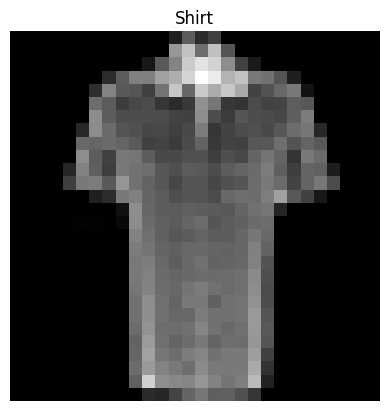

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Mô hình 0: Xây dựng mô hình cơ sở

Dữ liệu đã được tải và chuẩn bị!

Đã đến lúc xây dựng một **mô hình cơ sở** bằng cách kế thừa `nn.Module`.

**Mô hình cơ sở** là một trong những mô hình đơn giản nhất mà bạn có thể tưởng tượng.

Bạn sử dụng mô hình cơ sở làm điểm khởi đầu và cố gắng cải thiện nó với các mô hình phức tạp hơn tiếp theo.

Mô hình cơ sở của chúng ta sẽ bao gồm hai lớp [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

Chúng ta đã làm điều này trong một phần trước nhưng sẽ có một sự khác biệt nhỏ.

Bởi vì chúng ta đang làm việc với dữ liệu hình ảnh, chúng ta sẽ sử dụng một lớp khác để bắt đầu.

Và đó là lớp [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html).

`nn.Flatten()` nén các chiều của tensor thành một vector duy nhất.

Điều này dễ hiểu hơn khi bạn nhìn thấy nó.

In [13]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


Lớp `nn.Flatten()` đã thay đổi hình dạng của chúng ta từ `[color_channels, height, width]` thành `[color_channels, height*width]`.

Tại sao phải làm điều này?

Bởi vì bây giờ chúng ta đã biến dữ liệu pixel từ các chiều chiều cao và chiều rộng thành một **vector đặc trưng** dài.

Và các lớp `nn.Linear()` thích đầu vào của chúng ở dạng vector đặc trưng.

Hãy tạo mô hình đầu tiên của chúng ta sử dụng `nn.Flatten()` làm lớp đầu tiên.

In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Tuyệt vời!

Chúng ta đã có một lớp mô hình cơ sở có thể sử dụng, bây giờ hãy khởi tạo một mô hình.

Chúng ta sẽ cần thiết lập các tham số sau:
* `input_shape=784` - đây là số lượng đặc trưng bạn có đưa vào mô hình, trong trường hợp của chúng ta, đó là một cho mỗi pixel trong hình ảnh mục tiêu (28 pixel cao x 28 pixel rộng = 784 đặc trưng).
* `hidden_units=10` - số lượng đơn vị/neuron trong (các) lớp ẩn, con số này có thể là bất cứ thứ gì bạn muốn nhưng để giữ mô hình nhỏ, chúng ta sẽ bắt đầu với `10`.
* `output_shape=len(class_names)` - vì chúng ta đang làm việc với bài toán phân loại đa lớp, chúng ta cần một neuron đầu ra cho mỗi lớp trong bộ dữ liệu của chúng ta.

Hãy tạo một thể hiện của mô hình và gửi đến CPU hiện tại (chúng ta sẽ chạy một bài kiểm tra nhỏ để chạy `model_0` trên CPU so với một mô hình tương tự trên GPU sớm).

In [15]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Thiết lập hàm mất mát, bộ tối ưu hóa và các chỉ số đánh giá

Vì chúng ta đang làm việc với bài toán phân loại, hãy đưa vào script [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) và sau đó là `accuracy_fn()` mà chúng ta đã định nghĩa trong [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **Lưu ý:** Thay vì import và sử dụng hàm accuracy hoặc (các) chỉ số đánh giá của riêng chúng ta, bạn có thể import các chỉ số đánh giá khác nhau từ [gói TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).

In [16]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Tạo hàm để đo thời gian thí nghiệm

Hàm mất mát và bộ tối ưu hóa đã sẵn sàng!

Đã đến lúc bắt đầu huấn luyện mô hình.

Nhưng làm thế nào về việc chúng ta thực hiện một thí nghiệm nhỏ trong khi huấn luyện.

Ý tôi là, hãy tạo một hàm đo thời gian để đo thời gian mô hình của chúng ta mất để huấn luyện trên CPU so với sử dụng GPU.

Chúng ta sẽ huấn luyện mô hình này trên CPU nhưng mô hình tiếp theo trên GPU và xem điều gì xảy ra.

Hàm đo thời gian của chúng ta sẽ import hàm [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) từ module [`timeit`](https://docs.python.org/3/library/timeit.html) của Python.

In [18]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Tạo vòng lặp huấn luyện và huấn luyện mô hình trên các batch dữ liệu

Tuyệt vời!

Có vẻ như chúng ta đã có tất cả các mảnh ghép của câu đố sẵn sàng, một bộ đo thời gian, một hàm mất mát, một bộ tối ưu hóa, một mô hình và quan trọng nhất, một số dữ liệu.

Bây giờ hãy tạo một vòng lặp huấn luyện và một vòng lặp kiểm tra để huấn luyện và đánh giá mô hình của chúng ta.

Chúng ta sẽ sử dụng các bước tương tự như (các) notebook trước, mặc dù vì dữ liệu của chúng ta bây giờ ở dạng batch, chúng ta sẽ thêm một vòng lặp khác để lặp qua các batch dữ liệu của chúng ta.

Các batch dữ liệu của chúng ta được chứa trong các `DataLoader`, `train_dataloader` và `test_dataloader` cho việc chia dữ liệu huấn luyện và kiểm tra tương ứng.

Một batch là `BATCH_SIZE` mẫu của `X` (đặc trưng) và `y` (nhãn), vì chúng ta đang sử dụng `BATCH_SIZE=32`, các batch của chúng ta có 32 mẫu hình ảnh và mục tiêu.

Và vì chúng ta đang tính toán trên các batch dữ liệu, hàm mất mát và các chỉ số đánh giá của chúng ta sẽ được tính toán **mỗi batch** thay vì trên toàn bộ bộ dữ liệu.

Điều này có nghĩa là chúng ta sẽ phải chia các giá trị mất mát và độ chính xác cho số lượng batch trong dataloader tương ứng của mỗi bộ dữ liệu.

Hãy đi qua từng bước:
1. Lặp qua các epoch.
2. Lặp qua các batch huấn luyện, thực hiện các bước huấn luyện, tính toán train loss *mỗi batch*.
3. Lặp qua các batch kiểm tra, thực hiện các bước kiểm tra, tính toán test loss *mỗi batch*.
4. In ra những gì đang xảy ra.
5. Đo thời gian tất cả (cho vui).

Khá nhiều bước nhưng...

...nếu có nghi ngờ, hãy code ra.

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

C:\Users\iamki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:04<00:09,  4.63s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:08<00:04,  4.21s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:12<00:00,  4.30s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 12.905 seconds


Tuyệt! Có vẻ như mô hình cơ sở của chúng ta đã hoạt động khá tốt.

Nó cũng không mất quá nhiều thời gian để huấn luyện, thậm chí chỉ trên CPU, tôi tự hỏi liệu nó có tăng tốc trên GPU không?

Hãy viết một số mã để đánh giá mô hình của chúng ta.

## 4. Thực hiện dự đoán và nhận kết quả Mô hình 0

Vì chúng ta sẽ xây dựng một vài mô hình, việc viết một số mã để đánh giá tất cả chúng theo cách tương tự là một ý tưởng tốt.

Cụ thể, hãy tạo một hàm nhận vào một mô hình đã được huấn luyện, một `DataLoader`, một hàm mất mát và một hàm độ chính xác.

Hàm này sẽ sử dụng mô hình để thực hiện dự đoán trên dữ liệu trong `DataLoader` và sau đó chúng ta có thể đánh giá những dự đoán đó bằng hàm mất mát và hàm độ chính xác.

In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Trông tốt!

Chúng ta có thể sử dụng từ điển này để so sánh kết quả mô hình cơ sở với các mô hình khác sau này.

## 5. Thiết lập mã không phụ thuộc thiết bị (để sử dụng GPU nếu có)
Chúng ta đã thấy mất bao lâu để huấn luyện mô hình PyTorch trên 60,000 mẫu trên CPU.

> **Lưu ý:** Thời gian huấn luyện mô hình phụ thuộc vào phần cứng được sử dụng. Nhìn chung, nhiều bộ xử lý hơn có nghĩa là huấn luyện nhanh hơn và các mô hình nhỏ hơn trên các bộ dữ liệu nhỏ hơn thường sẽ huấn luyện nhanh hơn các mô hình lớn và bộ dữ liệu lớn.

Bây giờ hãy thiết lập một số [mã không phụ thuộc thiết bị](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) cho các mô hình và dữ liệu của chúng ta để chạy trên GPU nếu có sẵn.

Nếu bạn đang chạy notebook này trên Google Colab và bạn chưa bật GPU, bây giờ là lúc để bật nó qua `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. Nếu bạn làm điều này, runtime của bạn có thể sẽ reset và bạn sẽ phải chạy tất cả các ô phía trên bằng cách vào `Runtime -> Run before`.

In [21]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Tuyệt vời!

Hãy xây dựng một mô hình khác.

## 6. Mô hình 1: Xây dựng mô hình tốt hơn với tính phi tuyến

Chúng ta đã học về [sức mạnh của tính phi tuyến trong notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity).

Nhìn vào dữ liệu mà chúng ta đã làm việc, bạn có nghĩ rằng nó cần các hàm phi tuyến không?

Và hãy nhớ, tuyến tính có nghĩa là thẳng và phi tuyến có nghĩa là không thẳng.

Hãy cùng tìm hiểu.

Chúng ta sẽ làm điều đó bằng cách tái tạo một mô hình tương tự như trước, ngoại trừ lần này chúng ta sẽ đặt các hàm phi tuyến (`nn.ReLU()`) giữa mỗi lớp tuyến tính.

In [22]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

Trông tốt.

Bây giờ hãy khởi tạo nó với cùng cài đặt mà chúng ta đã sử dụng trước đây.

Chúng ta sẽ cần `input_shape=784` (bằng với số lượng đặc trưng của dữ liệu hình ảnh), `hidden_units=10` (bắt đầu nhỏ và giống như mô hình cơ sở của chúng ta) và `output_shape=len(class_names)` (một đơn vị đầu ra cho mỗi lớp).

> **Lưu ý:** Hãy chú ý cách chúng ta giữ hầu hết các cài đặt của mô hình giống nhau ngoại trừ một thay đổi: thêm các lớp phi tuyến. Đây là thực hành tiêu chuẩn để chạy một loạt thí nghiệm học máy, thay đổi một thứ và xem điều gì xảy ra, sau đó làm lại, lại, lại.

In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Thiết lập hàm mất mát, bộ tối ưu hóa và các chỉ số đánh giá

Như thường lệ, chúng ta sẽ thiết lập một hàm mất mát, một bộ tối ưu hóa và một chỉ số đánh giá (chúng ta có thể thực hiện nhiều chỉ số đánh giá nhưng bây giờ chúng ta sẽ chỉ sử dụng độ chính xác).

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 Chuyển các vòng lặp huấn luyện và kiểm tra thành hàm

Cho đến nay chúng ta đã viết các vòng lặp train và test lặp đi lặp lại.

Hãy viết chúng lần nữa nhưng lần này chúng ta sẽ đặt chúng trong các hàm để có thể gọi lại nhiều lần.

Và vì chúng ta đang sử dụng mã không phụ thuộc thiết bị bây giờ, chúng ta sẽ chắc chắn gọi `.to(device)` trên các tensor đặc trưng (`X`) và mục tiêu (`y`) của chúng ta.

Đối với vòng lặp huấn luyện, chúng ta sẽ tạo một hàm gọi là `train_step()` nhận vào một mô hình, một `DataLoader`, một hàm mất mát và một bộ tối ưu hóa.

Vòng lặp kiểm tra sẽ tương tự nhưng nó sẽ được gọi là `test_step()` và nó sẽ nhận vào một mô hình, một `DataLoader`, một hàm mất mát và một hàm đánh giá.

> **Lưu ý:** Vì đây là các hàm, bạn có thể tùy chỉnh chúng theo bất kỳ cách nào bạn thích. Những gì chúng ta đang tạo ở đây có thể được coi là các hàm huấn luyện và kiểm tra cơ bản cho trường hợp sử dụng phân loại cụ thể của chúng ta.

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Có vẻ như `model_1` bị [overfitting](https://en.wikipedia.org/wiki/Overfitting) (hiệu suất tốt trên dữ liệu huấn luyện nhưng kém trên dữ liệu test).

Có một số cách để ngăn ngừa overfitting:
1. Lấy thêm dữ liệu
2. Đơn giản hóa mô hình (loại bỏ lớp hoặc giảm số lượng đơn vị ẩn)
3. Sử dụng [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
4. Tăng [regularization](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
5. Early stopping

Hãy thử tìm kiếm trực tuyến, "cách ngăn ngừa overfitting trong học máy" và xem có gì xuất hiện.

Trong khi đó, hãy xem xét số 1: sử dụng một mô hình khác.

In [26]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:05<00:10,  5.08s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:10<00:05,  5.14s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:15<00:00,  5.30s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 15.899 seconds


Nếu chúng ta cố gắng truyền một hình ảnh duy nhất vào, chúng ta sẽ gặp lỗi không khớp hình dạng:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>

> **Lưu ý:** Nếu bạn đang chạy PyTorch 1.11.0+, lỗi này sẽ không xảy ra.

Điều này là do lớp `nn.Conv2d()` của chúng ta yêu cầu một tensor 4 chiều làm đầu vào với kích thước `(N, C, H, W)` hoặc `[batch_size, color_channels, height, width]`.

Hiện tại hình ảnh duy nhất `test_image` của chúng ta chỉ có hình dạng `[color_channels, height, width]` hoặc `[3, 64, 64]`.

Chúng ta có thể sửa lỗi này cho một hình ảnh duy nhất bằng cách sử dụng `test_image.unsqueeze(dim=0)` để thêm một chiều bổ sung cho `N`.

In [27]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

Hmm, chú ý điều gì xảy ra với hình dạng của chúng ta (cùng hình dạng như lớp đầu tiên của TinyVGG trên [CNN Explainer](https://poloclub.github.io/cnn-explainer/)), chúng ta có được các kích thước kênh khác nhau cũng như các kích thước pixel khác nhau.

Điều gì sẽ xảy ra nếu chúng ta thay đổi các giá trị của `conv_layer`?

In [28]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [29]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Ồ, chúng ta lại có một thay đổi hình dạng khác.

Bây giờ hình ảnh của chúng ta có hình dạng `[1, 10, 30, 30]` (nó sẽ khác nếu bạn sử dụng các giá trị khác) hoặc `[batch_size=1, color_channels=10, height=30, width=30]`.

Điều gì đang xảy ra ở đây?

Đằng sau những gì chúng ta thấy, `nn.Conv2d()` của chúng ta đang nén thông tin được lưu trữ trong hình ảnh.

Nó thực hiện điều này bằng cách thực hiện các phép toán trên đầu vào (hình ảnh test của chúng ta) với các tham số nội bộ của nó.

Và bằng cách thay đổi các hyperparameter của `nn.Conv2d()` (như `kernel_size`, `stride`, `padding`), chúng ta có thể thay đổi cách nó nén thông tin.

![ví dụ về việc thay đổi hyperparameter của lớp nn.Conv2d()](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Ví dụ về điều gì xảy ra khi bạn thay đổi các hyperparameter của lớp `nn.Conv2d()`.*

### 7.1 Bước qua `nn.Conv2d()`

Chúng ta có thể bắt đầu sử dụng mô hình của chúng ta ở trên và xem điều gì xảy ra nhưng trước tiên hãy bước qua hai lớp mới mà chúng ta đã thêm:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), còn được gọi là lớp tích chập.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), còn được gọi là lớp max pooling.

> **Câu hỏi:** "2d" trong `nn.Conv2d()` có nghĩa là gì?
>
> 2d là dành cho dữ liệu 2 chiều. Như trong, hình ảnh của chúng ta có hai chiều: chiều cao và chiều rộng. Có, có chiều kênh màu nhưng mỗi chiều kênh màu cũng có hai chiều: chiều cao và chiều rộng.
>
> Đối với dữ liệu chiều khác (như 1D cho văn bản hoặc 3D cho đối tượng 3D) cũng có `nn.Conv1d()` và `nn.Conv3d()`.

Để kiểm tra các lớp, hãy tạo một số dữ liệu đồ chơi giống như dữ liệu được sử dụng trên CNN Explainer.

## 7. Mô hình 2: Xây dựng Mạng Neural Tích Chập (CNN)

Được rồi, đã đến lúc nâng tầm lên một bậc.

Đã đến lúc tạo một [Mạng Neural Tích Chập](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN hoặc ConvNet).

CNN được biết đến với khả năng tìm ra các mẫu trong dữ liệu hình ảnh.

Và vì chúng ta đang xử lý dữ liệu hình ảnh, hãy xem liệu việc sử dụng mô hình CNN có thể cải thiện so với mô hình cơ sở của chúng ta hay không.

Mô hình CNN mà chúng ta sẽ sử dụng được gọi là TinyVGG từ trang web [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

Nó tuân theo cấu trúc điển hình của một mạng neural tích chập:

`Lớp đầu vào -> [Lớp tích chập -> lớp kích hoạt -> lớp pooling] -> Lớp đầu ra`

Trong đó nội dung của `[Lớp tích chập -> lớp kích hoạt -> lớp pooling]` có thể được mở rộng và lặp lại nhiều lần, tùy thuộc vào yêu cầu.

In [30]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Hãy tạo một ví dụ `nn.Conv2d()` với các tham số khác nhau:
* `in_channels` (int) - Số kênh trong hình ảnh đầu vào.
* `out_channels` (int) - Số kênh được tạo ra bởi phép tích chập.
* `kernel_size` (int hoặc tuple) - Kích thước của kernel/filter tích chập.
* `stride` (int hoặc tuple, tùy chọn) - Bước nhảy của kernel tích chập tại một thời điểm. Mặc định: 1.
* `padding` (int, tuple, str) - Padding được thêm vào cả bốn cạnh của đầu vào. Mặc định: 0.

![ví dụ về việc đi qua các tham số khác nhau của lớp Conv2d](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Ví dụ về điều gì xảy ra khi bạn thay đổi các tham số của lớp `nn.Conv2d()`.*

### 7.2 Bước qua `nn.MaxPool2d()`
Bây giờ hãy xem điều gì xảy ra khi chúng ta di chuyển dữ liệu qua `nn.MaxPool2d()`.

In [31]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [32]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

If we try to pass a single image in, we get a shape mismatch error:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **Note:** If you're running PyTorch 1.11.0+, this error won't occur.

This is because our `nn.Conv2d()` layer expects a 4-dimensional tensor as input with size `(N, C, H, W)` or `[batch_size, color_channels, height, width]`.

Right now our single image `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.

We can fix this for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [33]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [34]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

Hmm, notice what happens to our shape (the same shape as the first layer of TinyVGG on [CNN Explainer](https://poloclub.github.io/cnn-explainer/)), we get different channel sizes as well as different pixel sizes.

What if we changed the values of `conv_layer`?

In [35]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Oah, chúng ta lại có một thay đổi hình dạng khác.

Bây giờ hình ảnh của chúng ta có hình dạng `[1, 10, 30, 30]` (nó sẽ khác nếu bạn sử dụng các giá trị khác) hoặc `[batch_size=1, color_channels=10, height=30, width=30]`.

Điều gì đang xảy ra ở đây?

Đằng sau những gì chúng ta thấy, `nn.Conv2d()` của chúng ta đang nén thông tin được lưu trữ trong hình ảnh.

Nó thực hiện điều này bằng cách thực hiện các phép toán trên đầu vào (hình ảnh test của chúng ta) với các tham số nội bộ của nó.

Mục tiêu của điều này tương tự như tất cả các mạng neural khác mà chúng ta đã xây dựng.

Dữ liệu đi vào và các lớp cố gắng cập nhật các tham số nội bộ của chúng (các mẫu) để giảm hàm mất mát nhờ sự giúp đỡ từ bộ tối ưu hóa.

Điểm khác biệt duy nhất là *cách* các lớp khác nhau tính toán việc cập nhật tham số của chúng hoặc theo thuật ngữ PyTorch, phép toán có mặt trong phương thức `forward()` của lớp.

Nếu chúng ta kiểm tra `conv_layer_2.state_dict()` của chúng ta, chúng ta sẽ tìm thấy một thiết lập weight và bias tương tự như những gì chúng ta đã thấy trước đây.oah, we get another shape change.

In [36]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())


OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


Hãy nhìn đó! Một loạt các số ngẫu nhiên cho tensor weight và bias.

Các hình dạng của chúng được thao tác bởi các đầu vào mà chúng ta đã truyền vào nn.Conv2d() khi chúng ta thiết lập nó.

Hãy kiểm tra chúng.

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **Câu hỏi:** Chúng ta nên thiết lập các tham số của lớp `nn.Conv2d()` như thế nào?
>
> Đó là một câu hỏi hay. Nhưng tương tự như nhiều thứ khác trong học máy, các giá trị này không được cố định cứng nhắc (và nhớ rằng, vì đây là những giá trị mà chúng ta có thể tự thiết lập, chúng được gọi là "**siêu tham số**"). 
>
> Cách tốt nhất để tìm ra là thử các giá trị khác nhau và xem chúng ảnh hưởng như thế nào đến hiệu suất của mô hình.
>
> Hoặc thậm chí tốt hơn nữa, tìm một ví dụ hoạt động trên bài toán tương tự như của bạn (như chúng ta đã làm với TinyVGG) và sao chép nó. 

Chúng ta đang làm việc với một loại lớp khác với những gì chúng ta đã thấy trước đây.

Nhưng tiền đề vẫn giống nhau: bắt đầu với các số ngẫu nhiên và cập nhật chúng để biểu diễn dữ liệu tốt hơn.

### 7.2 Forward pass qua `nn.MaxPool2d()`

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Chú ý sự thay đổi trong các hình dạng của những gì xảy ra vào và ra khỏi lớp `nn.MaxPool2d()`.

`kernel_size` của lớp `nn.MaxPool2d()` sẽ ảnh hưởng đến kích thước của hình dạng đầu ra.

Trong trường hợp của chúng ta, hình dạng giảm một nửa từ hình ảnh `62x62` xuống hình ảnh `31x31`.

Hãy xem điều này hoạt động với một tensor nhỏ hơn.

In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Chú ý hai chiều cuối cùng giữa `random_tensor` và `max_pool_tensor`, chúng chuyển từ `[2, 2]` thành `[1, 1]`.

Về bản chất, chúng được giảm một nửa.

Và sự thay đổi sẽ khác với các giá trị `kernel_size` khác nhau cho `nn.MaxPool2d()`.

Cũng chú ý rằng giá trị còn lại trong `max_pool_tensor` là giá trị **lớn nhất** từ `random_tensor`.

Điều gì đang xảy ra ở đây?

Đây là một phần quan trọng khác trong bức tranh của mạng thần kinh.

Về cơ bản, **mỗi lớp trong mạng thần kinh đều cố gắng nén dữ liệu từ không gian chiều cao hơn xuống không gian chiều thấp hơn**.

Nói cách khác, lấy nhiều số (dữ liệu thô) và học các mẫu trong những số đó, các mẫu có tính dự đoán đồng thời cũng *nhỏ hơn* về kích thước so với các giá trị ban đầu.

Từ góc độ trí tuệ nhân tạo, bạn có thể coi toàn bộ mục tiêu của mạng thần kinh là *nén* thông tin.

![mỗi lớp của mạng thần kinh nén dữ liệu đầu vào ban đầu thành một biểu diễn nhỏ hơn mà (hy vọng) có khả năng đưa ra dự đoán về dữ liệu đầu vào trong tương lai](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

Điều này có nghĩa là, từ quan điểm của mạng thần kinh, trí thông minh là sự nén.

Đây là ý tưởng về việc sử dụng lớp `nn.MaxPool2d()`: lấy giá trị lớn nhất từ một phần của tensor và loại bỏ phần còn lại.

Về bản chất, giảm chiều của tensor trong khi vẫn giữ lại một phần (hy vọng) đáng kể của thông tin.

Câu chuyện cũng tương tự đối với lớp `nn.Conv2d()`.

Ngoại trừ thay vì chỉ lấy giá trị lớn nhất, `nn.Conv2d()` thực hiện một phép toán tích chập trên dữ liệu (xem điều này hoạt động trên [trang web CNN Explainer](https://poloclub.github.io/cnn-explainer/)).

> **Bài tập:** Bạn nghĩ lớp [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) làm gì? Hãy thử tạo một tensor ngẫu nhiên như chúng ta đã làm ở trên và truyền nó qua. Kiểm tra các hình dạng đầu vào và đầu ra cũng như các giá trị đầu vào và đầu ra.

> **Giáo trình bổ sung:** Tìm kiếm "mạng thần kinh tích chập phổ biến nhất", bạn tìm thấy những kiến trúc nào? Có kiến trúc nào trong số chúng được chứa trong thư viện [`torchvision.models`](https://pytorch.org/vision/stable/models.html) không? Bạn nghĩ bạn có thể làm gì với chúng?

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### 7.4 Huấn luyện và kiểm tra `model_2` bằng các hàm huấn luyện và kiểm tra của chúng ta

Hàm mất mát và optimizer đã sẵn sàng!

Đã đến lúc huấn luyện và kiểm tra.

Chúng ta sẽ sử dụng các hàm `train_step()` và `test_step()` mà chúng ta đã tạo trước đó.

Chúng ta cũng sẽ đo thời gian để so sánh với các mô hình khác của chúng ta.

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58677 | Train accuracy: 78.83%


 33%|███▎      | 1/3 [00:06<00:12,  6.19s/it]

Test loss: 0.38754 | Test accuracy: 85.91%

Epoch: 1
---------
Train loss: 0.35658 | Train accuracy: 87.25%


 67%|██████▋   | 2/3 [00:12<00:06,  6.24s/it]

Test loss: 0.34842 | Test accuracy: 87.24%

Epoch: 2
---------
Train loss: 0.32038 | Train accuracy: 88.39%


100%|██████████| 3/3 [00:18<00:00,  6.11s/it]

Test loss: 0.31344 | Test accuracy: 88.64%

Train time on cuda: 18.324 seconds


Ồ! Có vẻ như các lớp tích chập và max pooling đã giúp cải thiện hiệu suất một chút.

Hãy đánh giá kết quả của `model_2` bằng hàm `eval_model()` của chúng ta.

In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3134426772594452,
 'model_acc': 88.63817891373802}

## 8. Compare model results and training time

We've trained three different models.

1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

This is a regular practice in machine learning.

Building multiple models and performing multiple training experiments to see which performs best.

Let's combine our model results dictionaries into a DataFrame and find out.

In [ ]:
## 8. So sánh kết quả mô hình và thời gian huấn luyện

Tuyệt vời! Chúng ta đã huấn luyện ba mô hình khác nhau:

1. `model_0` - một mô hình cơ sở với các lớp `nn.Linear()`.
2. `model_1` - cùng thiết lập như mô hình cơ sở nhưng có thêm các lớp `nn.ReLU()` giữa các lớp `nn.Linear()`.
3. `model_2` - mô hình CNN đầu tiên của chúng ta mô phỏng kiến trúc TinyVGG trên trang web CNN Explainer.

Đây là một thực hành thường xuyên trong học máy.

Xây dựng nhiều mô hình và thực hiện nhiều thí nghiệm huấn luyện để xem mô hình nào hoạt động tốt nhất.

Hãy kết hợp các từ điển kết quả mô hình của chúng ta thành một DataFrame và tìm hiểu.

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.313443,88.638179


Tốt!

Chúng ta cũng có thể thêm các giá trị thời gian huấn luyện.

In [ ]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,20.902181
1,FashionMNISTModelV1,0.685001,75.019968,15.687625
2,FashionMNISTModelV2,0.313443,88.638179,18.324104


Có vẻ như mô hình CNN (`FashionMNISTModelV2`) của chúng ta hoạt động tốt nhất (mất mát thấp nhất, độ chính xác cao nhất) nhưng có thời gian huấn luyện dài nhất.

Và mô hình cơ sở (`FashionMNISTModelV0`) của chúng ta hoạt động tốt hơn `model_1` (`FashionMNISTModelV1`).

### Sự đánh đổi giữa hiệu suất và tốc độ

Điều cần lưu ý trong học máy là sự **đánh đổi giữa hiệu suất và tốc độ**.

Nói chung, bạn sẽ có được hiệu suất tốt hơn từ một mô hình lớn hơn, phức tạp hơn (như chúng ta đã làm với `model_2`).

Tuy nhiên, sự gia tăng hiệu suất này thường đi kèm với việc hy sinh tốc độ huấn luyện và tốc độ suy luận.

> **Lưu ý:** Thời gian huấn luyện bạn nhận được sẽ rất phụ thuộc vào phần cứng bạn sử dụng.
>
> Nói chung, càng có nhiều lõi CPU, mô hình của bạn sẽ huấn luyện càng nhanh trên CPU. Và tương tự cho GPU.
> 
> Phần cứng mới hơn (về tuổi) cũng thường huấn luyện mô hình nhanh hơn do kết hợp các tiến bộ công nghệ.

Làm thế nào để chúng ta có được hình ảnh trực quan?

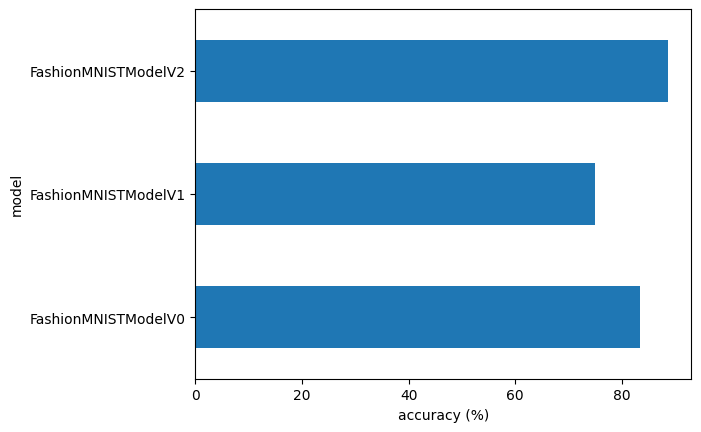

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

Được rồi, chúng ta đã so sánh các mô hình với nhau, hãy đánh giá thêm mô hình hoạt động tốt nhất của chúng ta, `model_2`.

Để làm điều này, hãy tạo một hàm `make_predictions()` nơi chúng ta có thể truyền vào mô hình và một số dữ liệu để nó dự đoán.

In [ ]:
## 9. Thực hiện và đánh giá dự đoán ngẫu nhiên với mô hình tốt nhất

Được rồi, bây giờ chúng ta đã có mô hình tốt nhất (`model_2`), hãy thực hiện một số dự đoán trên hình ảnh ngẫu nhiên từ tập dữ liệu test.

Để làm điều này, chúng ta sẽ:

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.4562e-07, 8.4880e-08, 7.6741e-08, 7.2228e-07, 3.5442e-08, 9.9952e-01,
         2.2921e-06, 1.0618e-05, 3.7776e-05, 4.3303e-04],
        [3.8788e-02, 5.7309e-01, 6.2164e-04, 1.2144e-01, 1.8728e-01, 5.6815e-05,
         7.7909e-02, 2.1733e-04, 1.5011e-04, 4.4569e-04]])

Và bây giờ chúng ta có thể sử dụng hàm `make_predictions()` để dự đoán trên `test_samples`.

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.4562e-07, 8.4880e-08, 7.6741e-08, 7.2228e-07, 3.5442e-08, 9.9952e-01,
         2.2921e-06, 1.0618e-05, 3.7776e-05, 4.3303e-04],
        [3.8788e-02, 5.7309e-01, 6.2164e-04, 1.2144e-01, 1.8728e-01, 5.6815e-05,
         7.7909e-02, 2.1733e-04, 1.5011e-04, 4.4569e-04]])

Tuyệt vời!

Và bây giờ chúng ta có thể chuyển từ xác suất dự đoán thành nhãn dự đoán bằng cách lấy `torch.argmax()` của đầu ra từ hàm kích hoạt `torch.softmax()`.

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Bây giờ các lớp dự đoán của chúng ta đã có cùng định dạng với nhãn test, chúng ta có thể so sánh.

Vì chúng ta đang xử lý dữ liệu hình ảnh, hãy giữ đúng với phương châm của nhà thám hiểm dữ liệu.

"Trực quan hóa, trực quan hóa, trực quan hóa!"

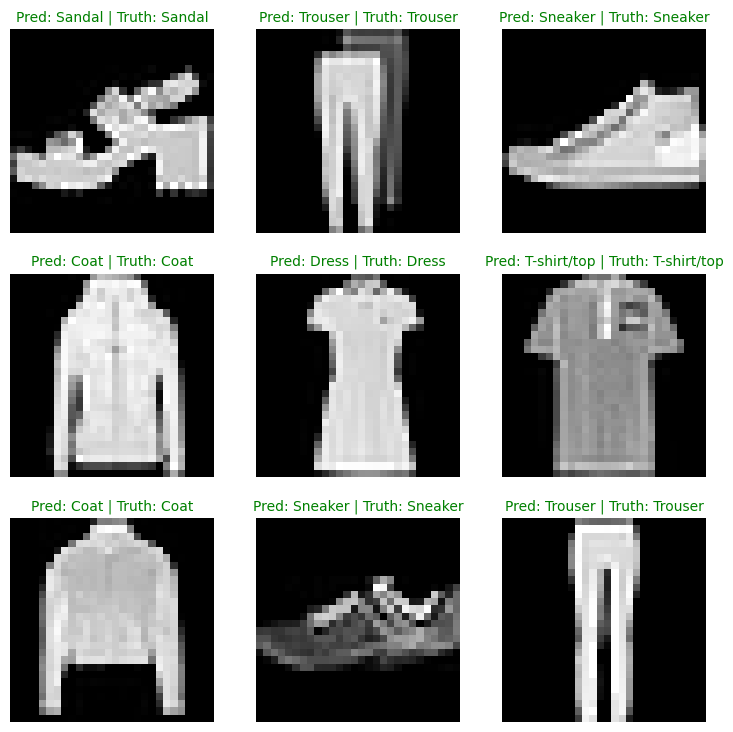

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

Tốt, tốt, tốt, có vẻ thật tuyệt vời!

Không tồi cho vài chục dòng code PyTorch!

## 10. Tạo ma trận nhầm lẫn để đánh giá dự đoán thêm

Dự đoán ngẫu nhiên thật tuyệt vời!

Nhưng để có cái nhìn tổng thể tốt hơn về mô hình của chúng ta đang dự đoán như thế nào, hãy tạo một [ma trận nhầm lẫn](https://en.wikipedia.org/wiki/Confusion_matrix).

Ma trận nhầm lẫn là một cách thức trực quan để xem mô hình của bạn đang dự đoán đúng và sai ở đâu.

Chúng ta có thể tạo một ma trận nhầm lẫn bằng cách sử dụng [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/references/modules.html#confusionmatrix) hoặc [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Hãy sử dụng `torchmetrics`.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 471.96it/s]


Tuyệt vời!

Bây giờ chúng ta đã có dự đoán, hãy thực hiện các bước 2 & 3:
2. Tạo ma trận nhầm lẫn sử dụng [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Vẽ ma trận nhầm lẫn sử dụng [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Trước tiên chúng ta cần đảm bảo rằng chúng ta đã cài đặt `torchmetrics` và `mlxtend` (hai thư viện này sẽ giúp chúng ta tạo và trực quan hóa ma trận nhầm lẫn).

> **Lưu ý:** Nếu bạn đang sử dụng Google Colab, phiên bản mặc định của `mlxtend` được cài đặt là 0.14.0 (tính đến tháng 3 năm 2022), tuy nhiên, đối với các tham số của hàm `plot_confusion_matrix()` mà chúng ta muốn sử dụng, chúng ta cần 0.19.0 hoặc cao hơn.

In [ ]:
! pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.7 MB/s eta 0:00:00


In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


Để vẽ ma trận nhầm lẫn, chúng ta cần đảm bảo rằng chúng ta có [`mlxtend`](http://rasbt.github.io/mlxtend/) phiên bản 0.19.0 hoặc cao hơn.

In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


`torchmetrics` và `mlxtend` đã cài đặt, hãy tạo ma trận nhầm lẫn!

Trước tiên chúng ta sẽ tạo một instance `torchmetrics.ConfusionMatrix` báo cho nó biết chúng ta đang xử lý bao nhiêu lớp bằng cách đặt `num_classes=len(class_names)`.

Sau đó chúng ta sẽ tạo ma trận nhầm lẫn (ở định dạng tensor) bằng cách truyền cho instance của chúng ta dự đoán của mô hình (`preds=y_pred_tensor`) và target (`target=test_data.targets`).

Cuối cùng chúng ta có thể vẽ ma trận nhầm lẫn sử dụng hàm `plot_confusion_matrix()` từ `mlxtend.plotting`.

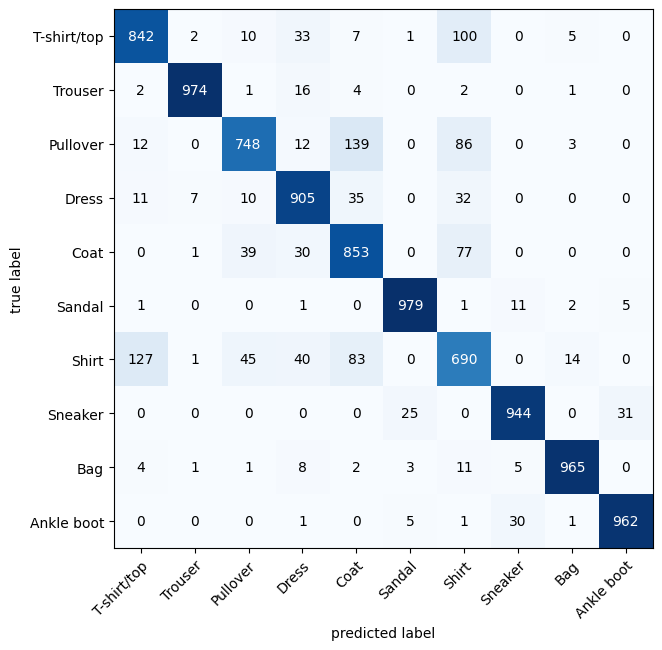

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

Wow! Trông có vẻ tuyệt đúng không?

Chúng ta có thể thấy mô hình của mình hoạt động khá tốt vì hầu hết các ô vuông tối nằm trên đường chéo từ trên trái xuống dưới phải (và mô hình lý tưởng sẽ chỉ có giá trị trong những ô vuông này và 0 ở mọi nơi khác).

Mô hình bị "nhầm lẫn" nhiều nhất trên các lớp tương tự nhau, ví dụ như dự đoán "Pullover" cho hình ảnh thực sự được gắn nhãn "Shirt".

Và tương tự khi dự đoán "Shirt" cho các lớp thực sự được gắn nhãn "T-shirt/top".

Loại thông tin này thường hữu ích hơn một metric độ chính xác duy nhất vì nó cho chúng ta biết *ở đâu* mô hình đang làm sai.

Nó cũng gợi ý *tại sao* mô hình có thể làm sai một số thứ.

Có thể hiểu được khi mô hình đôi khi dự đoán "Shirt" cho hình ảnh được gắn nhãn "T-shirt/top".

Chúng ta có thể sử dụng loại thông tin này để kiểm tra thêm các mô hình và dữ liệu để xem cách cải thiện.

> **Bài tập:** Sử dụng `model_2` đã huấn luyện để đưa ra dự đoán trên tập dữ liệu test FashionMNIST. Sau đó vẽ một số dự đoán mà mô hình đã sai cùng với nhãn của hình ảnh đáng lẽ phải có. Sau khi trực quan hóa những dự đoán này, bạn có nghĩ đó là lỗi mô hình hay lỗi dữ liệu không? Nghĩa là, mô hình có thể làm tốt hơn hay nhãn của dữ liệu quá gần nhau (ví dụ: nhãn "Shirt" quá gần với "T-shirt/top")?

## 11. Lưu và tải mô hình hoạt động tốt nhất

Tuyệt vời! Chúng ta đã có một mô hình hoạt động khá tốt.

Nhưng nếu chúng ta muốn sử dụng nó sau này thì sao?

Đó là lúc việc lưu và tải mô hình xuất hiện.

Có một số cách khác nhau để lưu và tải các mô hình PyTorch (chúng ta đã thảo luận về một số cách này trong [01. PyTorch Fundamentals](https://www.learnpytorch.io/01_pytorch_fundamentals/#saving-and-loading-tensors)).

Trong trường hợp này, vì chúng ta muốn lưu cả mô hình và trạng thái của nó (các tham số đã học được), chúng ta sẽ sử dụng [`torch.save()`](https://pytorch.org/docs/stable/generated/torch.save.html) với `model.state_dict()`.

> **Lưu ý:** Có hai cách chính để lưu và tải mô hình trong PyTorch, lưu và tải: 1) `state_dict()` (khuyến nghị) và 2) toàn bộ mô hình. Chúng ta sẽ sử dụng tùy chọn 1. Để biết thêm về các tùy chọn khác nhau để lưu và tải mô hình PyTorch, xem [tài liệu về lưu và tải mô hình của PyTorch](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


Bây giờ chúng ta đã có một `state_dict()` mô hình đã lưu, chúng ta có thể tải nó trở lại bằng cách kết hợp `load_state_dict()` và `torch.load()`.

Vì chúng ta đang sử dụng `load_state_dict()`, chúng ta sẽ cần tạo một instance mới của `FashionMNISTModelV2()` với cùng các tham số đầu vào như `state_dict()` mô hình đã lưu của chúng ta.

In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

Và bây giờ chúng ta đã có mô hình đã tải, chúng ta có thể đánh giá nó bằng `eval_model()` để đảm bảo rằng các tham số của nó hoạt động tương tự như `model_2` trước khi lưu.

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3134426772594452,
 'model_acc': 88.63817891373802}

Những kết quả này có giống với `model_2_results` không?

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3285697102546692,
 'model_acc': 88.37859424920129}

Chúng ta có thể tìm hiểu xem hai tensor có gần nhau không bằng cách sử dụng `torch.isclose()` và truyền vào mức độ dung sai gần nhau thông qua các tham số `atol` (dung sai tuyệt đối) và `rtol` (dung sai tương đối).

Nếu kết quả mô hình của chúng ta gần nhau, đầu ra của `torch.isclose()` sẽ là true.

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Bài tập

Tất cả các bài tập đều tập trung vào việc thực hành code trong các phần trên.

Bạn nên tự mình thử làm chúng trước tiên và sau đó so sánh với giải pháp.

Tất cả các bài tập nên được hoàn thành bằng [code bất biến thiết bị](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Tài nguyên:**
* [Notebook mẫu bài tập cho 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Notebook giải pháp mẫu cho 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (hãy thử các bài tập *trước khi* xem cái này)

**Bài tập:**

1. Bạn có nghĩ việc lấy thêm dữ liệu sẽ cải thiện hiệu suất mô hình của chúng ta không? Tại sao có hoặc tại sao không?
2. Tạo một DataLoader để tải toàn bộ tập dữ liệu huấn luyện FashionMNIST (tắt tính năng đáo trộn và đặt `batch_size=len(train_data)`, `len(train_data)` là gì?) và thực hiện 1 đợt forward pass qua `model_2`, thời gian này mất bao lâu? Tại sao bạn nghĩ nó mất nhiều thời gian hơn so với dự đoán trên một hình ảnh duy nhất?
3. Có những cách nào để ngăn ngừa overfitting? Liệt kê 3 cách và giải thích cách chúng hoạt động.
    * *Gợi ý:* Tìm kiếm "cách ngăn ngừa overfitting trong học máy".
4. Dành 20 phút đọc và nhấp qua [trang web CNN Explainer](https://poloclub.github.io/cnn-explainer/).
    * Tải lên hình ảnh ví dụ của riêng bạn bằng nút "upload" trên trang web và xem điều gì xảy ra trong mỗi lớp của CNN khi hình ảnh của bạn đi qua nó.
5. Tải tập dữ liệu huấn luyện và test [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).
6. Trực quan hóa ít nhất 5 mẫu khác nhau của tập dữ liệu huấn luyện MNIST.
7. Chuyển đổi tập dữ liệu huấn luyện và test MNIST thành dataloaders bằng `torch.utils.data.DataLoader`, đặt `batch_size=32`.
8. Tái tạo `model_2` được sử dụng trong notebook này (cùng mô hình từ [trang web CNN Explainer](https://poloclub.github.io/cnn-explainer/), còn được gọi là TinyVGG) có khả năng phù hợp với tập dữ liệu MNIST.
9. Huấn luyện mô hình bạn đã xây dựng trong bài tập 8. trên CPU và GPU và xem mỗi cái mất bao lâu.
10. Thực hiện dự đoán bằng mô hình đã huấn luyện của bạn và trực quan hóa ít nhất 5 trong số chúng so sánh dự đoán với nhãn đích.
11. Vẽ ma trận nhầm lẫn so sánh dự đoán của mô hình với nhãn thật.
12. Tạo một tensor ngẫu nhiên có hình dạng `[1, 3, 64, 64]` và truyền nó qua lớp `nn.Conv2d()` với các cài đặt hyperparameter khác nhau (bạn có thể chọn bất kỳ cài đặt nào), bạn nhận thấy gì nếu tham số `kernel_size` tăng hoặc giảm?
13. Sử dụng mô hình tương tự như `model_2` đã huấn luyện từ notebook này để thực hiện dự đoán trên tập dữ liệu test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).
    * Sau đó vẽ một số dự đoán mà mô hình đã sai cùng với nhãn của hình ảnh đáng lẽ phải có.
    * Sau khi trực quan hóa những dự đoán này, bạn có nghĩ đó là lỗi mô hình hay lỗi dữ liệu không?
    * Như trong, mô hình có thể làm tốt hơn hay nhãn của dữ liệu quá gần nhau (ví dụ: nhãn "Shirt" quá gần với "T-shirt/top")?

## Giáo trình bổ sung
* **Xem:** Bài giảng [Giới thiệu về Thị giác máy tính sâu của MIT](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3). Điều này sẽ cung cấp cho bạn trực giác tuyệt vời về mạng neural tích chập.
* Dành 10 phút nhấp qua các tùy chọn khác nhau của [thư viện PyTorch vision](https://pytorch.org/vision/stable/index.html), có những module khác nhau nào?
* Đọc qua và làm theo [hướng dẫn PyTorch transfer learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html), tại sao transfer learning lại hữu ích?
* Cố gắng viết mã từ đầu (ví dụ: không nhìn vào notebook này) để tải FashionMNIST, chuyển nó thành DataLoaders và huấn luyện một mô hình để có được độ chính xác >95% trên tập test trong vòng 10 epochs.
* Đọc qua tài liệu cho [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) và [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), điều gì xảy ra nếu bạn không đáo trộn dữ liệu huấn luyện? Tại sao điều này có thể là một vấn đề?